## California Housing Prices Dataset.

the dataset contains these columns:

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea





In [29]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')

In [30]:
df = pd.read_csv('/content/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [32]:
print(f'rows: {df.shape[0]}')
print(f'columns: {df.shape[1]}')

rows: 20640
columns: 10


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [35]:
median = df.groupby('ocean_proximity')['median_house_value'].median()
median 

ocean_proximity
<1H OCEAN     214850.0
INLAND        108500.0
ISLAND        414700.0
NEAR BAY      233800.0
NEAR OCEAN    229450.0
Name: median_house_value, dtype: float64

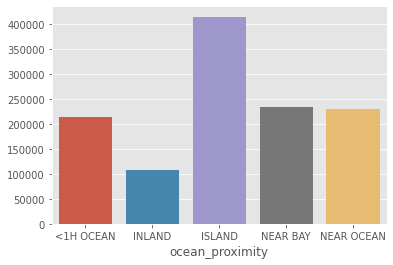

In [36]:
median = df.groupby('ocean_proximity')['median_house_value'].median()
sns.barplot(x=median.index,y=median.values);

Island houses are the highest average price.

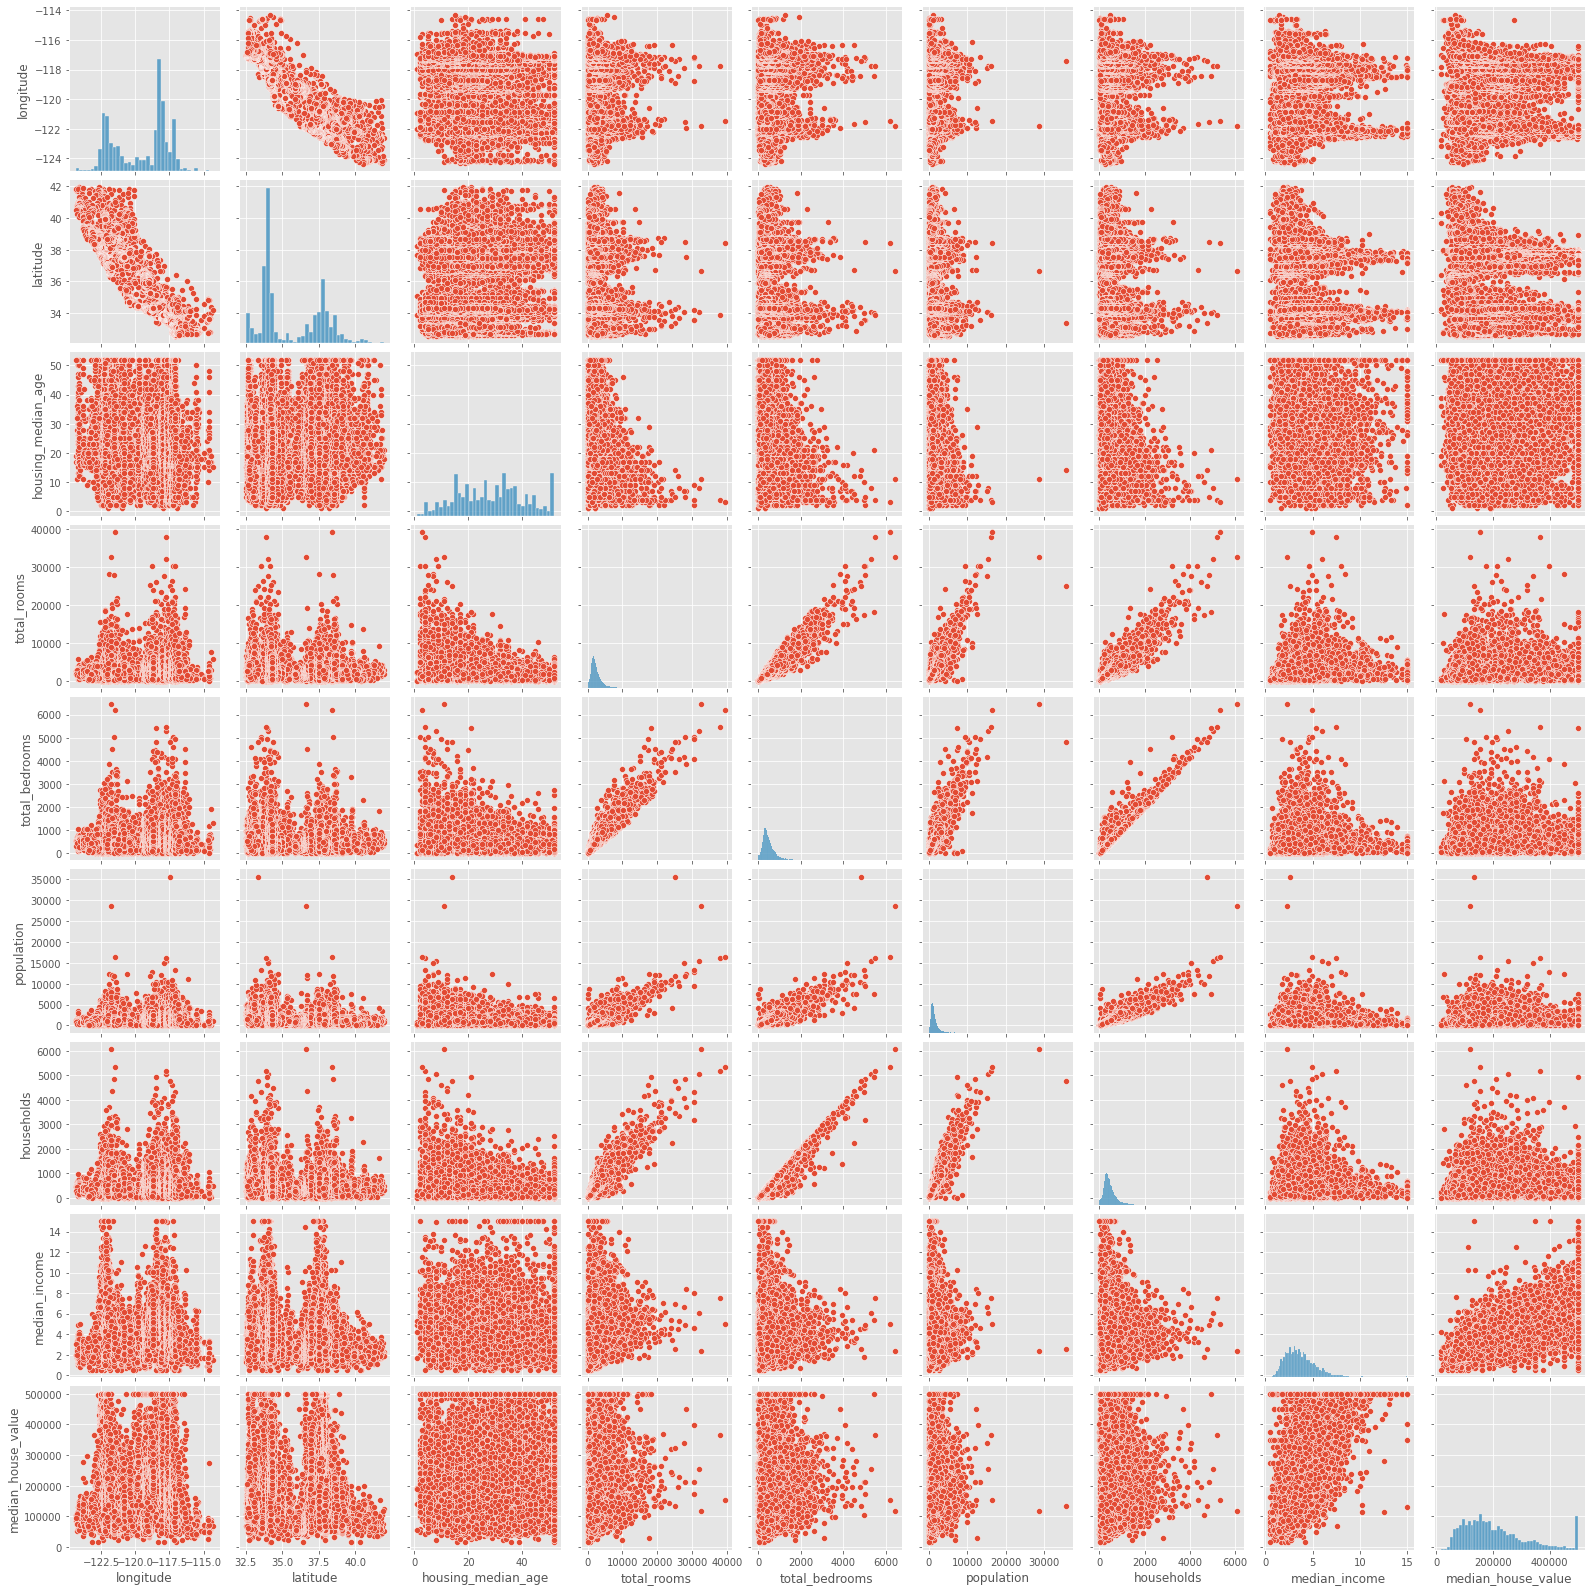

In [37]:
sns.pairplot(df);

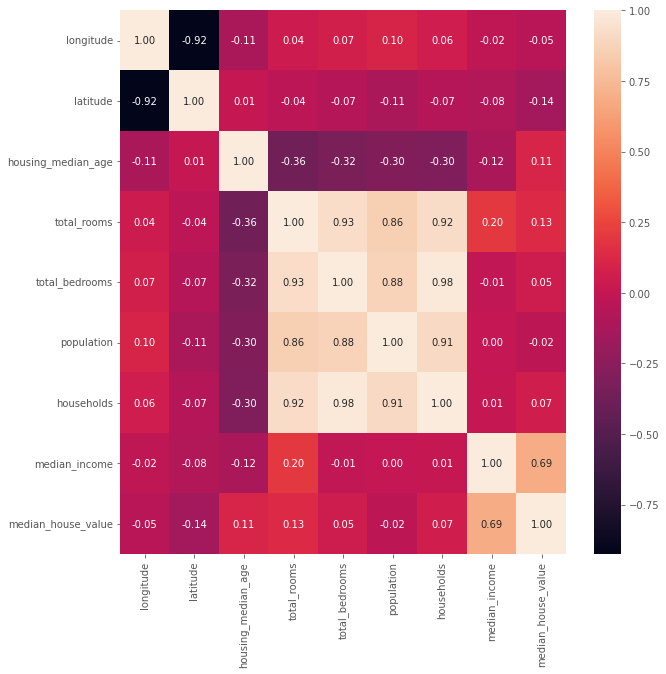

In [38]:
non_object_df = [col for col in df.columns if col != 'ocean_proximity']
corr = df[non_object_df].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, fmt= '.2f');

there are strong relationship between many features like (total_rooms and total_bedrooms, population and households), (total_bedroom and population, households), (population and households) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

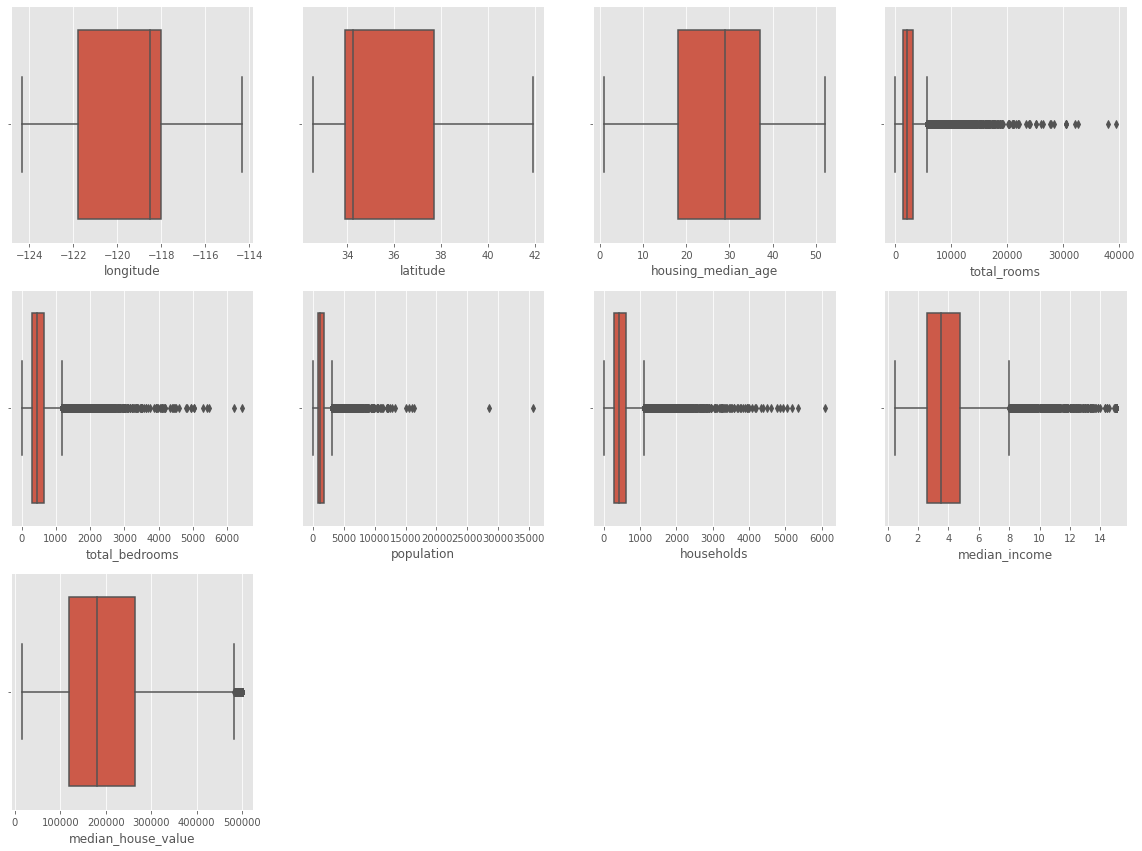

In [39]:
plt.figure(figsize=(20,20))
for i,col in enumerate(non_object_df):
    plt.subplot(4,4,i+1) 
    sns.boxplot(df[col])

In [40]:
def ratio_of_outlier(data):
    q1 = df[data].quantile(0.25)
    q3 = df[data].quantile(0.75)
    iqr = q3 - q1
    max_limit = q3 + iqr * 1.5
    min_limit = q1 - iqr * 1.5 
    outlier = [x for x in df[data] if x > max_limit or x < min_limit ]
    return len(outlier)/len(df[data])

dic = {}
for col in non_object_df:
    dic[col]=ratio_of_outlier(col)
pd.DataFrame(dic,index=['ratio_of_outlier'])    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ratio_of_outlier,0.0,0.0,0.0,0.062355,0.061579,0.057946,0.059109,0.032994,0.05189


ratio of outlier does not affect on removing them from dataset

In [41]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [42]:
for col in non_object_df:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    max_limit = q3 + iqr * 1.5
    min_limit = q1 - iqr * 1.5 
    outlier = [x for x in df[col] if x > max_limit or x < min_limit ]
    df[col] = df[col].replace(outlier,np.nan) # replace outlier with Nan value 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


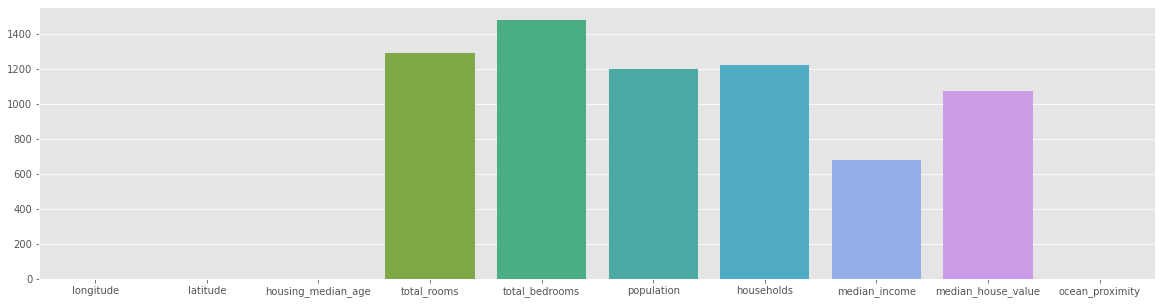

In [43]:
plt.figure(figsize=(20,5))
x = df.isnull().sum().index
y = df.isnull().sum().values
sns.barplot(x,y);

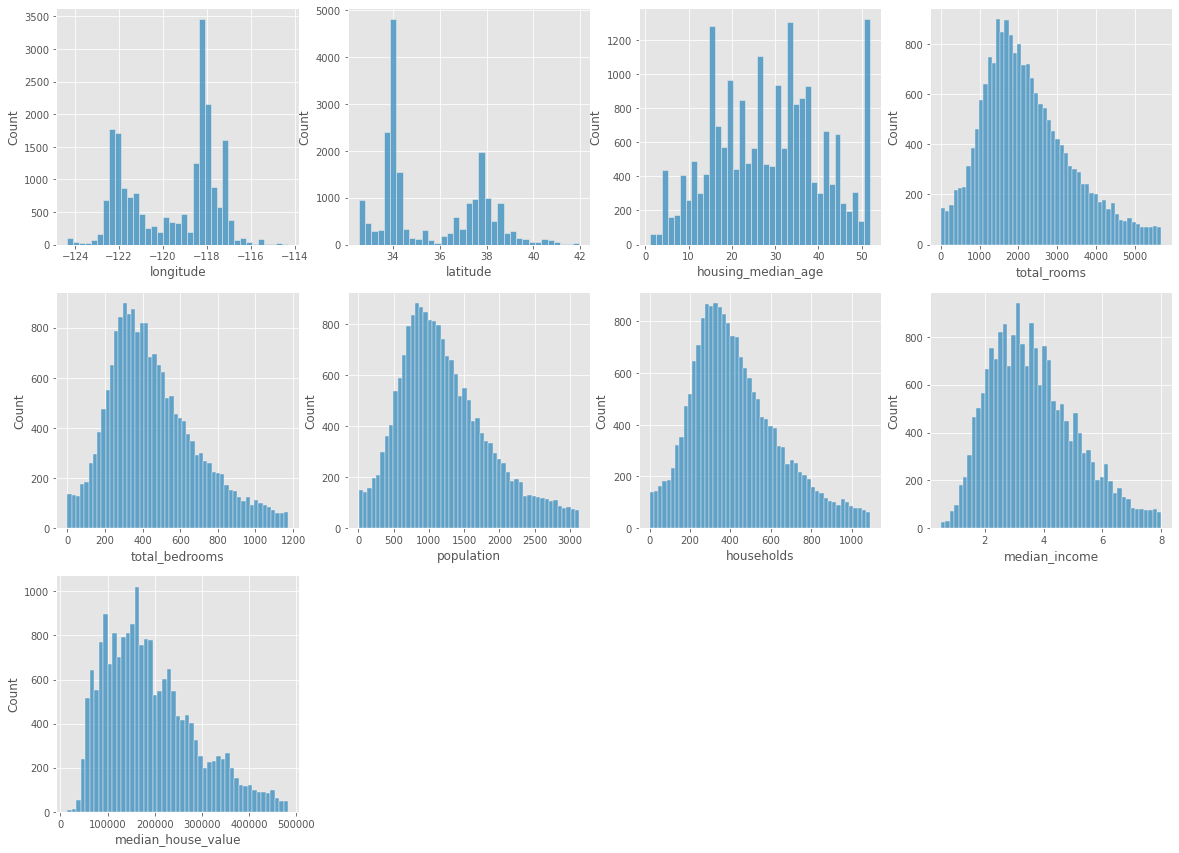

In [44]:
plt.figure(figsize=(20,20))
for i,col in enumerate(non_object_df):
    plt.subplot(4,4,i+1) 
    sns.histplot(df[col])

there are skewness in the data, so we will replace nan values with median vale

In [45]:
for col in ['total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']:
    df[col] = df[col].fillna(df[col].median())

In [46]:
def transform(data):
    if data <= 10: 
        re = 'Age <= 10'
    elif data <=20:
        re = 'Age <= 20' 
    elif data <=30:
        re = 'Age <= 30'
    elif data <=40:
        re = 'Age <= 40'
    else :
       re = 'Age > 40'
    return re         
df['housing_median_age']=df['housing_median_age'].apply(transform)          
df['housing_median_age']

0         Age > 40
1        Age <= 30
2         Age > 40
3         Age > 40
4         Age > 40
           ...    
20635    Age <= 30
20636    Age <= 20
20637    Age <= 20
20638    Age <= 20
20639    Age <= 20
Name: housing_median_age, Length: 20640, dtype: object

In [48]:
df.to_csv('Data_Housing')